In [1]:
# To display plots and figures inline 
%matplotlib inline
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Setting plot display parameters  
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (12, 9)
sns.set_style('darkgrid')

# Suppress warnings display
import warnings
warnings.filterwarnings('ignore')

Flare            - Numeric  - An ID number, ymmddnn, e.g., 2042101 is the first flare found for 21-Apr-2002.
Start.date       - DateTime - The date when the flare occurred
Start.time       - DateTime - Flare start time
Peak             - DateTime - Flare peak time
End              - String   - Flare end time
Dur[s]           - Numeric  - Duration of flare in seconds
Peak[c/s]        - Numeric  - Peak count rate in corrected counts, peak counts/second
Total Counts     - Numeric  -  Total of counts in corrected counts, counts in energy range
Energy [keV]     - String   - The highest energy band in which the flare was observed.
X pos [asec]     - Numeric  -  Flare position in arcsec from sun center
Y pos [asec]     - Numeric  -  Flare position in arcsec from sun center
Radial [asec]    - Radial distance in arcsec from sun center
active.region.ar - String   - flags indicating the quality of the data during the flare, instrument status, possible non-solar                               origin, orbital status (SAA, night, etc), and reliability of the position information.
flag.1           - String   - No Description
flag.2           - String   - No Description
flag.3           - String   - No Description
flag.4           - String   - No Description
flag.5           - String   - No Description

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# Reading the dataset and displaying a few records
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hessi.solar.flare.2002to2016.csv',sep=",")
df.head(5)

FileNotFoundError: ignored

In [ ]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113942 entries, 0 to 113941
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   flare             113942 non-null  int64 
 1   start.date        113942 non-null  object
 2   start.time        113942 non-null  object
 3   peak              113942 non-null  object
 4   end               113942 non-null  object
 5   duration.s        113942 non-null  int64 
 6   peak.c/s          113942 non-null  int64 
 7   total.counts      113942 non-null  int64 
 8   energy.kev        113942 non-null  object
 9   x.pos.asec        113942 non-null  int64 
 10  y.pos.asec        113942 non-null  int64 
 11  radial            113942 non-null  int64 
 12  active.region.ar  113942 non-null  int64 
 13  flag.1            113942 non-null  object
 14  flag.2            113942 non-null  object
 15  flag.3            94035 non-null   object
 16  flag.4            93740 non-null   obj

In [ ]:
df.describe()

,flare,duration.s,peak.c/s,total.counts,x.pos.asec,y.pos.asec,radial,active.region.ar
count,1.139420e+05,113942.000000,113942.000000,1.139420e+05,113942.000000,113942.000000,113942.000000,113942.000000
mean,1.086459e+07,493.051728,212.321532,3.772013e+05,-9.752181,-43.129812,689.528892,979.922926
std,9.832864e+06,433.389295,833.776871,3.071203e+06,757.017401,404.547666,513.203089,1350.484625
min,2.021213e+06,8.000000,0.000000,8.000000e+00,-10012.000000,-10005.000000,0.000000,0.000000
25%,4.110734e+06,212.000000,28.000000,2.292000e+04,-704.000000,-249.000000,469.000000,0.000000
50%,1.112022e+07,364.000000,53.000000,5.857400e+04,0.000000,-75.000000,759.000000,687.000000
75%,1.403013e+07,628.000000,144.000000,1.794420e+05,706.000000,198.000000,946.000000,1543.000000
max,1.412161e+08,4444.000000,113156.000000,4.355501e+08,1002.000000,1012.000000,14154.000000,9999.000000


In [ ]:
# counting null values
df.isnull().sum()

flare                   0
start.date              0
start.time              0
peak                    0
end                     0
duration.s              0
peak.c/s                0
total.counts            0
energy.kev              0
x.pos.asec              0
y.pos.asec              0
radial                  0
active.region.ar        0
flag.1                  0
flag.2                  0
flag.3              19907
flag.4              20202
flag.5              60951
dtype: int64

In [ ]:
# Making flare ID as index and parsing dates
new_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hessi.solar.flare.2002to2016.csv',sep=",", index_col=0)

# process date / time columns
def parse_date(sdatex,stimex):
    datex = datetime.strptime(sdatex, '%Y-%m-%d')
    timex = datetime.strptime(stimex, '%H:%M:%S')
    return datetime(datex.year,datex.month,datex.day,timex.hour,timex.minute,timex.second)

# Adding year, month, day, start date, peak date, end date and dropping earlier columns
new_df['dt.start'] = new_df[['start.date','start.time']].apply(lambda x: parse_date(x[0],x[1]), axis=1)
new_df['dt.peak'] = new_df[['start.date','peak']].apply(lambda x: parse_date(x[0],x[1]), axis=1)
new_df['dt.end'] = new_df[['start.date','end']].apply(lambda x: parse_date(x[0],x[1]), axis=1)

# clean columns
new_df.drop(['start.date','start.time','peak','end'], axis=1, inplace=True)

# add new columns
new_df['year'] = new_df['dt.start'].apply(lambda col: col.year)
new_df['month'] = new_df['dt.start'].apply(lambda col: col.month)
new_df['day'] = new_df['dt.start'].apply(lambda col: col.day)

In [ ]:
# Displaying current columns of dataframe
new_df.columns

Index(['duration.s', 'peak.c/s', 'total.counts', 'energy.kev', 'x.pos.asec',
       'y.pos.asec', 'radial', 'active.region.ar', 'flag.1', 'flag.2',
       'flag.3', 'flag.4', 'flag.5', 'dt.start', 'dt.peak', 'dt.end', 'year',
       'month', 'day'],
      dtype='object')

In [ ]:
# Renaming columns with better names 
new_df = new_df.rename(columns = {'duration.s':'duration_s', 'peak.c/s':'peak_c_s', 'total.counts':'total_counts', 'energy.kev':'energy_kev', 'x.pos.asec':'x_pos_asec',
       'y.pos.asec':'y_pos_asec', 'active.region.ar':'active_region_ar', 'flag.1':'flag_1', 'flag.2':'flag_2',
       'flag.3':'flag_3', 'flag.4':'flag_4', 'flag.5':'_flag_5', 'dt.start':'date_start', 'dt.peak':'date_peak', 'dt.end':'date_end'})

In [ ]:
# Display new processed dataframe
new_df.head(5)

,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial,active_region_ar,flag_1,flag_2,flag_3,flag_4,_flag_5,date_start,date_peak,date_end,year,month,day
flare,,,,,,,,,,,,,,,,,,,
2021213,712,136,167304,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN,2002-02-12 21:29:56,2002-02-12 21:33:38,2002-02-12 21:41:48,2002,2,12
2021228,288,7,9504,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN,2002-02-12 21:44:08,2002-02-12 21:45:06,2002-02-12 21:48:56,2002,2,12
2021332,216,15,11448,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN,2002-02-13 00:53:24,2002-02-13 00:54:54,2002-02-13 00:57:00,2002,2,13
2021308,244,20,17400,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN,2002-02-13 04:22:52,2002-02-13 04:23:50,2002-02-13 04:26:56,2002,2,13
2021310,236,336,313392,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2,2002-02-13 07:03:52,2002-02-13 07:05:14,2002-02-13 07:07:48,2002,2,13


Text(0.5, 1.0, 'Correlation heatmap between the features')

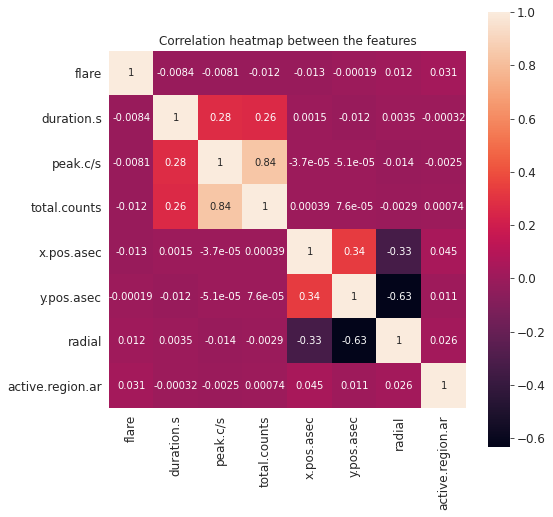

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(), annot = True, square=True, ax = ax).set_title('Correlation heatmap between the features')

In [ ]:
#Selecting 1000 rows and 4 coulmns from new dataframe for plots and finding value distribution and relation
data_part = new_df.iloc[0:113941, 0:4]
data_part

,duration_s,peak_c_s,total_counts,energy_kev
flare,,,,
2021213,712,136,167304,12-25
2021228,288,7,9504,6-12
2021332,216,15,11448,6-12
2021308,244,20,17400,12-25
2021310,236,336,313392,25-50
...,...,...,...,...
16122602,564,288,126976,3-6
16122603,484,152,75328,3-6
16122604,1096,304,142048,3-6


In [ ]:

# Display column names for data part
data_part.columns

Index(['duration_s', 'peak_c_s', 'total_counts', 'energy_kev'], dtype='object')

### Relation between Flare duration, Peak count rate and Total count with respect to Energy

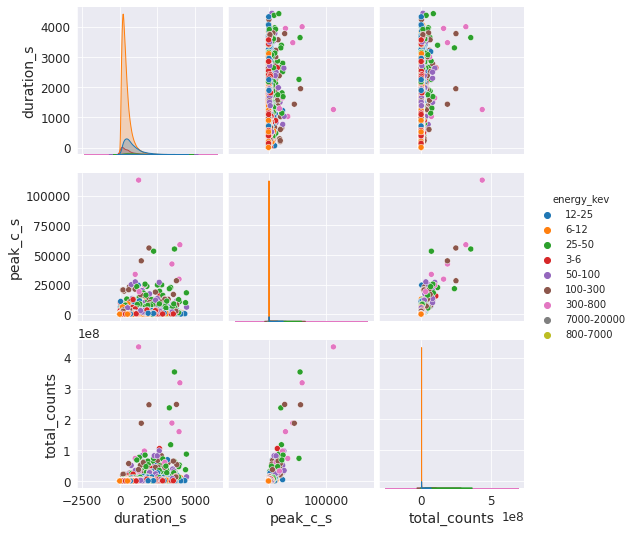

In [ ]:
sns.pairplot(data=data_part, hue='energy_kev', vars=['duration_s', 'peak_c_s', 'total_counts'])


###***Density plot to visualize the distribution of the Flare wrt. Energy***

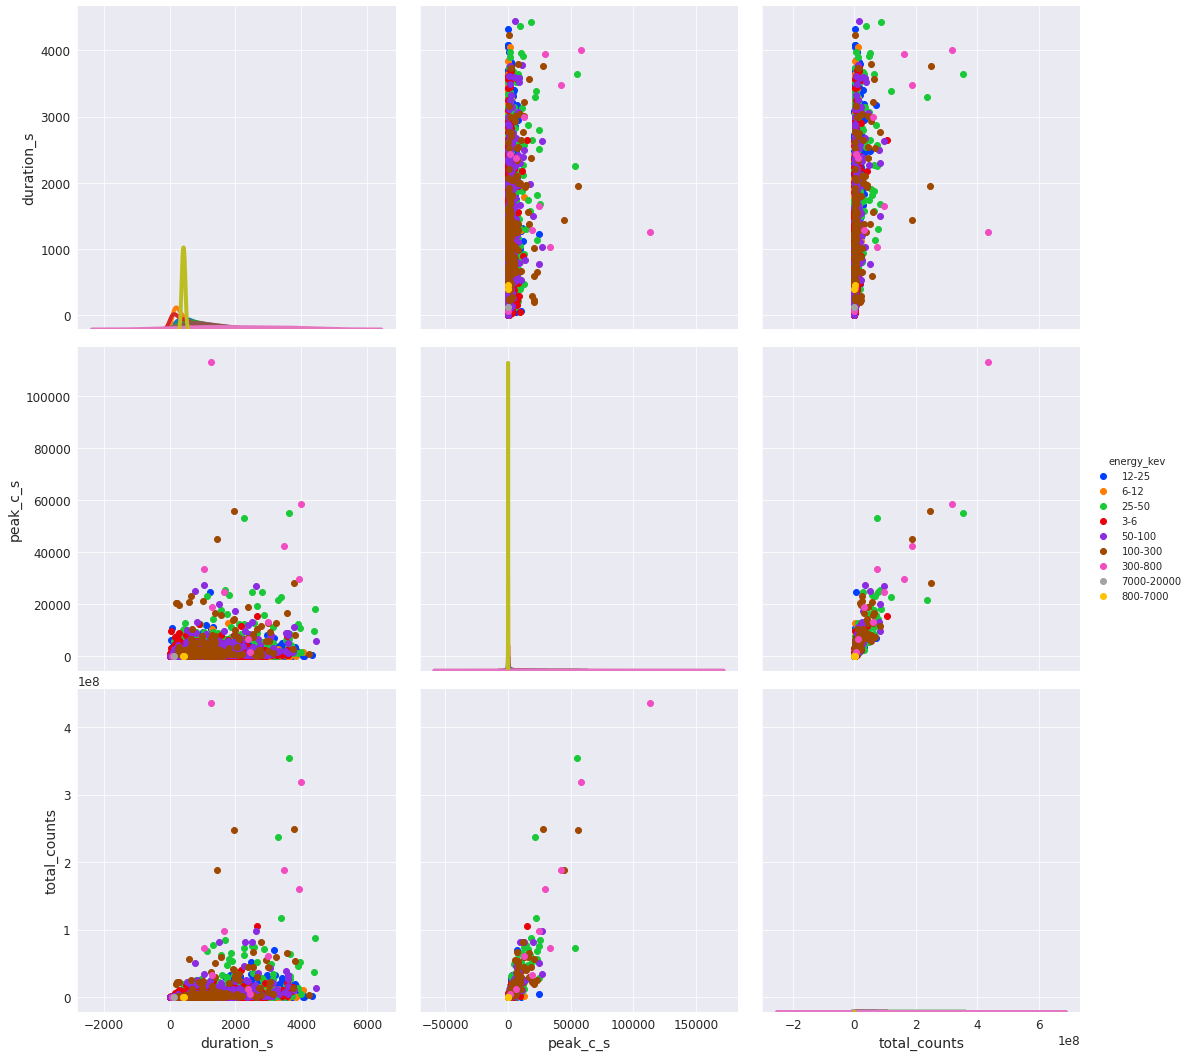

In [ ]:
g =  sns.PairGrid(data_part, hue='energy_kev', palette='bright', size=5)

def f(x, **kwargs):
    kwargs.pop("color")
    col = next(plt.gca()._get_lines.prop_cycler)['color']
    sns.kdeplot(x, color=col, **kwargs, linewidth=4)

g.map_diag(f)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

### ***Countplot on the entire dataset to verify assumption***


Text(0, 0.5, 'Energy Density Range (KeV)')

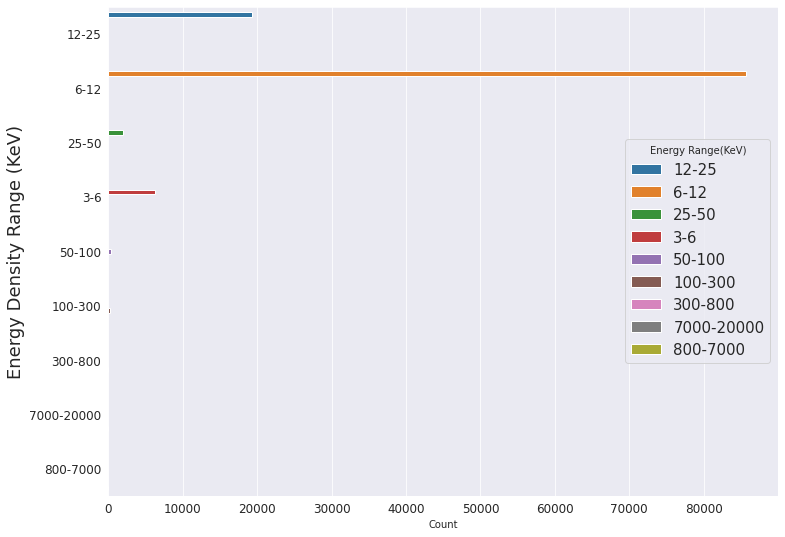

In [ ]:
sns.countplot(y='energy_kev', data=data_part, hue='energy_kev')
plt.legend(title='Energy Range(KeV)', loc='right', prop={'size': 15})
plt.xlabel('Count', fontsize=10)
plt.ylabel('Energy Density Range (KeV)', fontsize=18)


In [ ]:
data_part['energy_kev'].value_counts()

6-12          85694
12-25         19364
3-6            6336
25-50          1944
50-100          407
100-300         181
300-800          12
800-7000          2
7000-20000        1
Name: energy_kev, dtype: int64

###***Histogram and Density Curve of Flare Duration***





Text(0, 0.5, 'Energy Density')

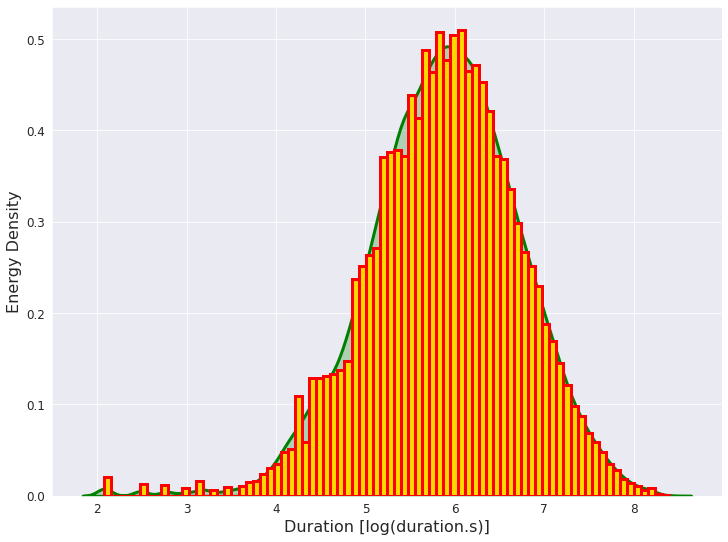

In [ ]:
df['duration_s_log'] = np.log(df['duration.s'])
sns.distplot(df['duration_s_log'], bins=80, kde_kws=dict(color='green', lw=3, shade=True),
             hist_kws=dict(alpha=1, color= 'gold',edgecolor='red', lw=3))
plt.xlabel('Duration [log(duration.s)]', fontsize=16)
plt.ylabel('Energy Density', fontsize=16)

### Relation between Duration and log(count of flare)

Text(0.5, 0, 'Energy (KeV)')

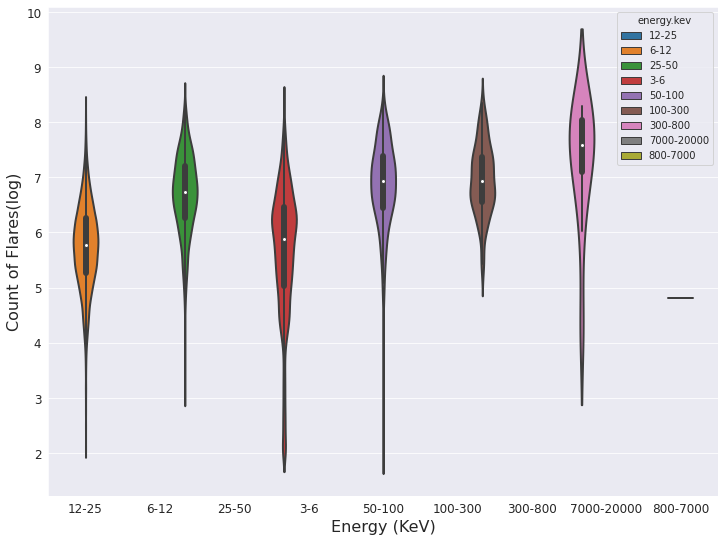

In [ ]:
df['flare_log'] = np.log(df['duration.s'])
sns.violinplot(x=df['energy.kev'], y=df['flare_log'], width=3, linewidth=2, hue=df['energy.kev'])
plt.ylabel('Count of Flares(log)', fontsize=16)
plt.xlabel('Energy (KeV)', fontsize=16)

### Filtering data - removing flares having attributes null or NaN values

### Data Preprocessing

In [ ]:
predicting_df = df.copy(deep = True)
predicting_df.columns

Index(['flare', 'start.date', 'start.time', 'peak', 'end', 'duration.s',
       'peak.c/s', 'total.counts', 'energy.kev', 'x.pos.asec', 'y.pos.asec',
       'radial', 'active.region.ar', 'flag.1', 'flag.2', 'flag.3', 'flag.4',
       'flag.5', 'duration_s_log', 'flare_log'],
      dtype='object')

In [ ]:
predicting_df = predicting_df.rename(columns = {'start.date':'start_date', 'start.time':'start_time','duration.s':'duration_s', 'peak.c/s':'peak_c_s', 'total.counts':'total_counts', 'energy.kev':'energy_kev', 'x.pos.asec':'x_pos_asec','y.pos.asec':'y_pos_asec', 'active.region.ar':'active_region_ar', 'flag.1':'flag_1', 'flag.2':'flag_2',
       'flag.3':'flag_3', 'flag.4':'flag_4', 'flag.5':'flag_5'})
predicting_df.head(3)



,flare,start_date,start_time,peak,end,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial,active_region_ar,flag_1,flag_2,flag_3,flag_4,flag_5,duration_s_log,flare_log
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN,6.568078,6.568078
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN,5.662960,5.662960
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN,5.375278,5.375278


In [ ]:
predicting_df1 = predicting_df.drop(['start_date','start_time','peak','end','flag_1','flag_2','flag_3', 'flag_4', 'flag_5'], axis= 1,inplace=False)
predicting_df1.head(3)

,flare,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial,active_region_ar,duration_s_log,flare_log
0,2021213,712,136,167304,12-25,592,-358,692,0,6.568078,6.568078
1,2021228,288,7,9504,6-12,604,-341,694,9811,5.662960,5.662960
2,2021332,216,15,11448,6-12,-310,375,487,9825,5.375278,5.375278


In [ ]:
# Enumerating energy range values from str to category
dt = predicting_df1['energy_kev'].astype('category')
dict(enumerate((dt.cat.categories)))

{0: '100-300',
 1: '12-25',
 2: '25-50',
 3: '3-6',
 4: '300-800',
 5: '50-100',
 6: '6-12',
 7: '7000-20000',
 8: '800-7000'}

In [ ]:
# Assigning the enumerated codes to ernegy column
predicting_df1['energy_kev'] = dt.cat.codes

# Display dataset - Focus on the energy_kev column, the ranges have been converted to categorial values
predicting_df1.head(5)

,flare,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial,active_region_ar,duration_s_log,flare_log
0,2021213,712,136,167304,1,592,-358,692,0,6.568078,6.568078
1,2021228,288,7,9504,6,604,-341,694,9811,5.662960,5.662960
2,2021332,216,15,11448,6,-310,375,487,9825,5.375278,5.375278
3,2021308,244,20,17400,1,-277,378,469,9822,5.497168,5.497168
4,2021310,236,336,313392,2,-272,390,476,9825,5.463832,5.463832


### Creating train and test set for models

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(predicting_df1, test_size=0.3)

X_train.shape, X_test.shape




((79759, 11), (34183, 11))

In [ ]:
y_train = X_train['energy_kev']
X_train = X_train.drop(['energy_kev'], axis=1)

y_test = X_test['energy_kev']
X_test = X_test.drop(['energy_kev'], axis=1)

# Using K Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kneighbors_classifier = KNeighborsClassifier().fit(X_train, y_train)
kneighbors_predictions = kneighbors_classifier.predict(X_test)
kneighbors_score = kneighbors_classifier.score(X_test, y_test)
kneighbors_score_train = kneighbors_classifier.score(X_train, y_train)
print("TEST RESULT=",kneighbors_score,"TRAIN RESULT=",kneighbors_score_train)

TEST RESULT= 0.762016206886464 TRAIN RESULT= 0.8252360235208566


In [ ]:
#Confusion matrix
from sklearn import metrics
print ('\nReport on data set:')
print(metrics.classification_report(y_test, kneighbors_predictions))
print(metrics.precision_recall_fscore_support(y_test, kneighbors_predictions, average='micro'))


Report on data set:
              precision    recall  f1-score   support

           0       0.19      0.11      0.14        55
           1       0.45      0.42      0.43      5773
           2       0.14      0.03      0.05       604
           3       0.43      0.22      0.29      1881
           4       0.00      0.00      0.00         2
           5       0.19      0.03      0.05       117
           6       0.84      0.90      0.87     25750
           8       0.00      0.00      0.00         1

    accuracy                           0.76     34183
   macro avg       0.28      0.21      0.23     34183
weighted avg       0.73      0.76      0.74     34183

(0.762016206886464, 0.762016206886464, 0.7620162068864641, None)


# Using Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression().fit(X_train, y_train)
logistic_regression_predictions = logistic_regression.predict(X_test)
logistic_regression_score = logistic_regression.score(X_test, y_test)
logistic_regression_score_train = logistic_regression.score(X_train, y_train)
print("TEST=",logistic_regression_score,"TRAIN=", logistic_regression_score_train)

TEST= 0.77424450750373 TRAIN= 0.7732795045073283


In [ ]:

#Confusion matrix
from sklearn import metrics
print ('\nReport on data set:')
print(metrics.classification_report(y_test, logistic_regression_predictions))
print(metrics.precision_recall_fscore_support(y_test, logistic_regression_predictions, average='micro'))



Report on data set:
              precision    recall  f1-score   support

           0       0.38      0.05      0.10        55
           1       0.55      0.25      0.35      5773
           2       0.08      0.00      0.00       604
           3       0.00      0.00      0.00      1881
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00       117
           6       0.79      0.97      0.87     25750
           8       0.00      0.00      0.00         1

    accuracy                           0.77     34183
   macro avg       0.22      0.16      0.16     34183
weighted avg       0.69      0.77      0.72     34183

(0.77424450750373, 0.77424450750373, 0.7742445075037299, None)


# Using Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier().fit(X_train, y_train)
decision_tree_predictions = decision_tree_classifier.predict(X_test)
decision_tree_score = decision_tree_classifier.score(X_test, y_test)
decision_tree_score_train = decision_tree_classifier.score(X_train, y_train)
decision_tree_score, decision_tree_score_train

(0.8141766375098733, 1.0)

In [ ]:
print ('\nReport on data set:')
print(metrics.classification_report(y_test, decision_tree_predictions))
print(metrics.precision_recall_fscore_support(y_test, decision_tree_predictions, average='micro'))


Report on data set:
              precision    recall  f1-score   support

           0       0.05      0.05      0.05        55
           1       0.50      0.50      0.50      5773
           2       0.10      0.10      0.10       604
           3       1.00      1.00      1.00      1881
           4       0.00      0.00      0.00         2
           5       0.11      0.15      0.13       117
           6       0.89      0.89      0.89     25750
           8       0.00      0.00      0.00         1

    accuracy                           0.81     34183
   macro avg       0.33      0.34      0.33     34183
weighted avg       0.82      0.81      0.81     34183

(0.8141766375098733, 0.8141766375098733, 0.8141766375098733, None)


# Using Random Forests Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_jobs=-1).fit(X_train, y_train)
random_forest_predictions = random_forest_classifier.predict(X_test)
random_forest_score = random_forest_classifier.score(X_test, y_test)
random_forest_score_train = random_forest_classifier.score(X_train, y_train)
random_forest_score, random_forest_score_train

(0.8686481584413305, 1.0)

In [ ]:
print ('\nReport on data set:')
print(metrics.classification_report(y_test, random_forest_predictions))
print(metrics.precision_recall_fscore_support(y_test, random_forest_predictions, average='micro'))


Report on data set:
              precision    recall  f1-score   support

           0       0.23      0.05      0.09        55
           1       0.67      0.53      0.59      5773
           2       0.36      0.04      0.07       604
           3       1.00      1.00      1.00      1881
           4       0.00      0.00      0.00         2
           5       0.50      0.03      0.05       117
           6       0.89      0.96      0.93     25750
           8       0.00      0.00      0.00         1

    accuracy                           0.87     34183
   macro avg       0.46      0.33      0.34     34183
weighted avg       0.85      0.87      0.85     34183

(0.8686481584413305, 0.8686481584413305, 0.8686481584413305, None)


# Using Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_classifier = GradientBoostingClassifier().fit(X_train, y_train)
gradient_classifier_predictions = gradient_classifier.predict(X_test)
gradient_classifier_score = gradient_classifier.score(X_test, y_test)
gradient_classifier_score_train = gradient_classifier.score(X_train, y_train)
gradient_classifier_score, gradient_classifier_score_train

(0.867946055056607, 0.8756002457402926)

In [ ]:
print ('\nReport on data set:')
print(metrics.classification_report(y_test, gradient_classifier_predictions))
print(metrics.precision_recall_fscore_support(y_test, gradient_classifier_predictions, average='micro'))


Report on data set:
              precision    recall  f1-score   support

           0       0.23      0.13      0.16        55
           1       0.68      0.51      0.58      5773
           2       0.40      0.03      0.06       604
           3       1.00      0.99      1.00      1881
           4       0.00      0.00      0.00         2
           5       0.22      0.05      0.08       117
           6       0.89      0.96      0.93     25750
           8       0.00      0.00      0.00         1

    accuracy                           0.87     34183
   macro avg       0.43      0.34      0.35     34183
weighted avg       0.85      0.87      0.85     34183

(0.867946055056607, 0.867946055056607, 0.867946055056607, None)


##Using support vector machine

In [ ]:
from sklearn.svm import SVC

SV_classifier = SVC().fit(X_train, y_train)
SV_predictions = SV_classifier.predict(X_test)
SV_score = SV_classifier.score(X_test, y_test)
SV_score_train = SV_classifier.score(X_train, y_train)
SV_score, SV_score_train

(0.7762923090425065, 0.7765017114056094)

In [ ]:
print ('\nReport on data set:')
print(metrics.classification_report(y_test, SV_predictions))
print(metrics.precision_recall_fscore_support(y_test, SV_predictions, average='micro'))


Report on data set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.60      0.20      0.30      5773
           2       0.33      0.01      0.02       604
           3       0.00      0.00      0.00      1881
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00       117
           6       0.79      0.99      0.88     25750
           8       0.00      0.00      0.00         1

    accuracy                           0.78     34183
   macro avg       0.22      0.15      0.15     34183
weighted avg       0.70      0.78      0.71     34183

(0.7762923090425065, 0.7762923090425065, 0.7762923090425065, None)


#### 1. K Nearest Neighbours           = 76.58% accuracy
#### 2. Logistic regression                =  78.28% accuracy
#### 3. Decision Tree Classifier         = 81.73% accuracy
#### 4. Random Forests Classifier    = 86.47% accuracy
#### 5. Gradient Boosting Classifier = 87.08% accuarcy